In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
#Importing neccesary libraries
data = pd.read_csv("Customer Segmentation.csv")
data.head(10)

,Unnamed: 0,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,460394,Female,No,32,Yes,Healthcare,9.0,Low,3.0,Cat_6,D
1,1,461798,Female,No,56,Yes,Artist,0.0,Low,1.0,Cat_6,A
2,2,464976,Male,Yes,75,No,Lawyer,1.0,Low,1.0,Cat_4,D
3,3,462104,Male,Yes,39,No,Entertainment,9.0,Low,2.0,Cat_3,D
4,4,464829,Male,No,22,No,Healthcare,9.0,Low,5.0,Cat_4,D
5,5,464634,Female,No,32,Yes,Engineer,NaN,Low,9.0,Cat_4,D
6,6,467670,Male,No,25,No,Engineer,NaN,Low,3.0,Cat_6,A
7,7,462073,Female,No,36,Yes,Artist,6.0,Low,1.0,Cat_6,C
8,8,463611,Male,No,62,Yes,Artist,0.0,Low,NaN,Cat_6,A
9,9,460962,Male,Yes,55,Yes,Executive,9.0,High,4.0,Cat_6,C


In [39]:
data.isnull().sum()

Unnamed: 0            0
ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [40]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10690    False
10691    False
10692    False
10693    False
10694    False
Length: 10695, dtype: bool

In [41]:
data.drop_duplicates()

,Unnamed: 0,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,460394,Female,No,32,Yes,Healthcare,9.0,Low,3.0,Cat_6,D
1,1,461798,Female,No,56,Yes,Artist,0.0,Low,1.0,Cat_6,A
2,2,464976,Male,Yes,75,No,Lawyer,1.0,Low,1.0,Cat_4,D
3,3,462104,Male,Yes,39,No,Entertainment,9.0,Low,2.0,Cat_3,D
4,4,464829,Male,No,22,No,Healthcare,9.0,Low,5.0,Cat_4,D
...,...,...,...,...,...,...,...,...,...,...,...,...
10690,10690,462861,Female,No,30,Yes,Healthcare,8.0,Low,1.0,Cat_6,D
10691,10691,464409,Female,Yes,81,Yes,Lawyer,0.0,Average,2.0,Cat_6,A
10692,10692,465861,Female,No,40,Yes,Entertainment,14.0,Low,1.0,Cat_6,A
10693,10693,465056,Male,Yes,87,Yes,Lawyer,1.0,High,2.0,Cat_6,A


In [42]:
data.columns

Index(['Unnamed: 0', 'ID', 'Gender', 'Ever_Married', 'Age', 'Graduated',
       'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size',
       'Var_1', 'Segmentation'],
      dtype='object')

#Dropping the records with null values

In [43]:
data.dropna(inplace=True)

In [44]:
data.shape

(8819, 12)

#Dropping unneccesary columns

In [45]:
data.drop('Unnamed: 0',axis=1,inplace = True)

In [46]:
data.drop('ID',axis=1,inplace = True)

In [47]:
data.drop('Var_1',axis=1,inplace=True)

In [48]:
data.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Female,No,32,Yes,Healthcare,9.0,Low,3.0,D
1,Female,No,56,Yes,Artist,0.0,Low,1.0,A
2,Male,Yes,75,No,Lawyer,1.0,Low,1.0,D
3,Male,Yes,39,No,Entertainment,9.0,Low,2.0,D
4,Male,No,22,No,Healthcare,9.0,Low,5.0,D


#Data Description

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8819 entries, 0 to 10694
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8819 non-null   object 
 1   Ever_Married     8819 non-null   object 
 2   Age              8819 non-null   int64  
 3   Graduated        8819 non-null   object 
 4   Profession       8819 non-null   object 
 5   Work_Experience  8819 non-null   float64
 6   Spending_Score   8819 non-null   object 
 7   Family_Size      8819 non-null   float64
 8   Segmentation     8819 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 689.0+ KB


In [50]:
data.describe()

,Age,Work_Experience,Family_Size
count,8819.000000,8819.000000,8819.000000
mean,43.517859,2.610160,2.840118
std,16.581537,3.390676,1.535051
min,18.000000,0.000000,1.000000
25%,31.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


1.How age affects the spending score of the customer?

In [51]:
#Converting the ordinal values of Spending score column into numerical values
data['Spending_Score_Encoded'] = data['Spending_Score'].map({'Low': 1, 'Medium': 2, 'High': 3})
x = data['Age']
y = data['Spending_Score_Encoded']
corr_x_y = x.corr(y)
print("Correlation between age and spending score: ",corr_x_y)

Correlation between age and spending score:  0.4520554739122638


2.What is the average age of consumer?

In [52]:
#The average age of customer 
avg_age = np.mean(data['Age'])
print("Average age of a customer: ",avg_age)

Average age of a customer:  43.51785916770609


3. Which age group has the highest spending score?

C:\Users\Nikita\AppData\Local\Temp\ipykernel_4764\3661697709.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_scores = data.groupby('Age_Group')['Spending_Score_Encoded'].mean().sort_values(ascending=True)


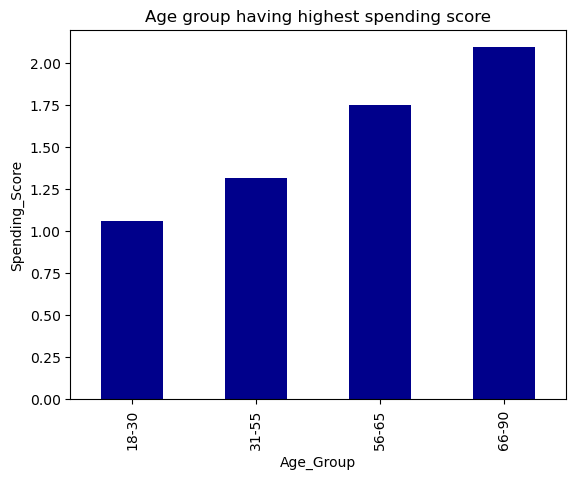

In [53]:
data['Spending_Score_Encoded'] = data['Spending_Score'].map({'Low': 1, 'Medium': 2, 'High': 3})

#Creating a age group
bins = [18,30,55,65,90]
labels = ["18-30","31-55","56-65","66-90"]
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Calculate average spending score per age group
group_scores = data.groupby('Age_Group')['Spending_Score_Encoded'].mean().sort_values(ascending=True)

#Plotting a bar chart
group_scores.plot(kind="bar", color="darkblue")
plt.title("Age group having highest spending score")
plt.xlabel("Age_Group")
plt.ylabel("Spending_Score")
plt.show()

4. Does the spending score vary significantly between genders?

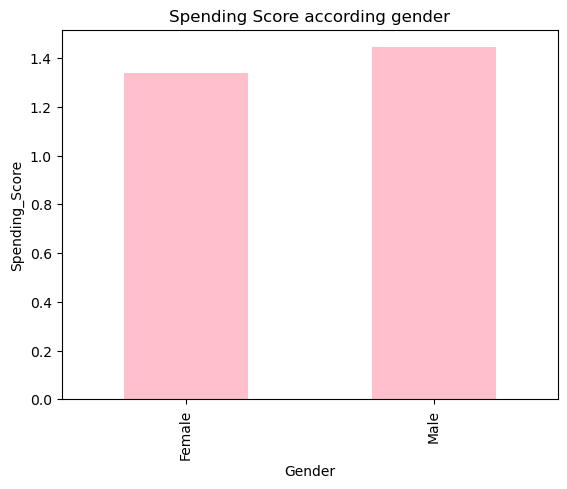

In [54]:
#Converting the ordinal values of Spending score column into numerical values
spending_score_genders = data.groupby('Gender')['Spending_Score_Encoded'].mean().sort_values(ascending=True)
#Plotting a bar chart
spending_score_genders.plot(kind="bar", color="pink")
plt.title("Spending Score according gender")
plt.xlabel("Gender")
plt.ylabel("Spending_Score")
plt.show()

C:\Users\Nikita\AppData\Local\Temp\ipykernel_4764\4196286497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Spending_Score'], y=data['Age'], data=data, palette='pastel')


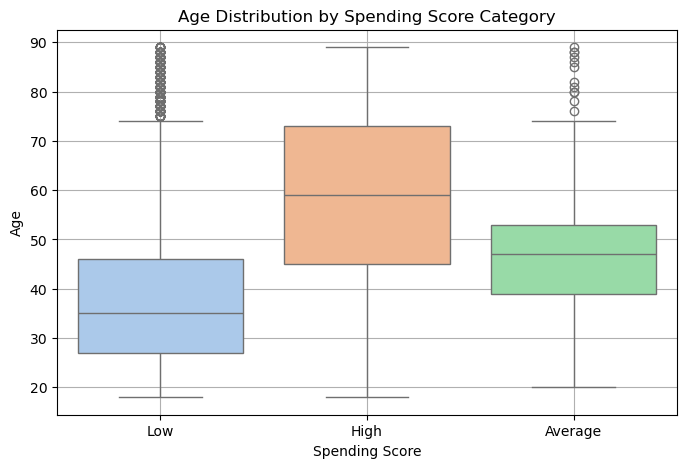

In [55]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Spending_Score'], y=data['Age'], data=data, palette='pastel')

plt.title('Age Distribution by Spending Score Category')
plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.grid()
plt.show()

5.What proportion of customers are married versus unmarried?

In [56]:
data.groupby('Ever_Married').count()

,Gender,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,Spending_Score_Encoded,Age_Group
Ever_Married,,,,,,,,,,
No,3603,3603,3603,3603,3603,3603,3603,3603,3603,3603
Yes,5216,5216,5216,5216,5216,5216,5216,5216,3033,5216


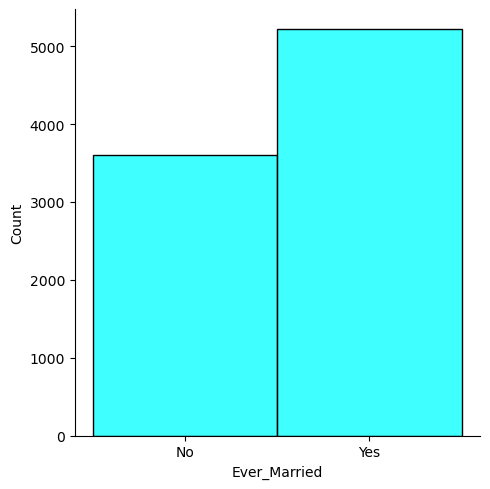

In [57]:
sns.displot(data=data,x=data['Ever_Married'],color='aqua')


6. What are the most common professions among the customers?

In [58]:
# Count most common professions
profession_counts = data['Profession'].value_counts()

print("Most Common Professions:")
print(profession_counts)

Most Common Professions:
Profession
Artist           2888
Healthcare       1414
Entertainment    1063
Doctor            798
Engineer          777
Lawyer            673
Executive         652
Marketing         325
Homemaker         229
Name: count, dtype: int64


7. How many customers fall into each segmentation category (A, B, C, D)?

Segmentation category-wise customer count:
Segmentation
D    2388
A    2308
C    2101
B    2022
Name: count, dtype: int64


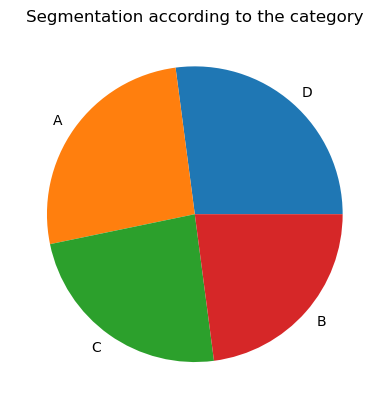

In [59]:
segmentation_category_count = data['Segmentation'].value_counts()

print("Segmentation category-wise customer count:")
print(segmentation_category_count)

plt.pie(segmentation_category_count,labels=['D','A','C','B'])
plt.title("Segmentation according to the category")
plt.show()

8. Multi-Panel Comparison by Marital Status
for side-by-side plotting of profession vs age group for married vs unmarried

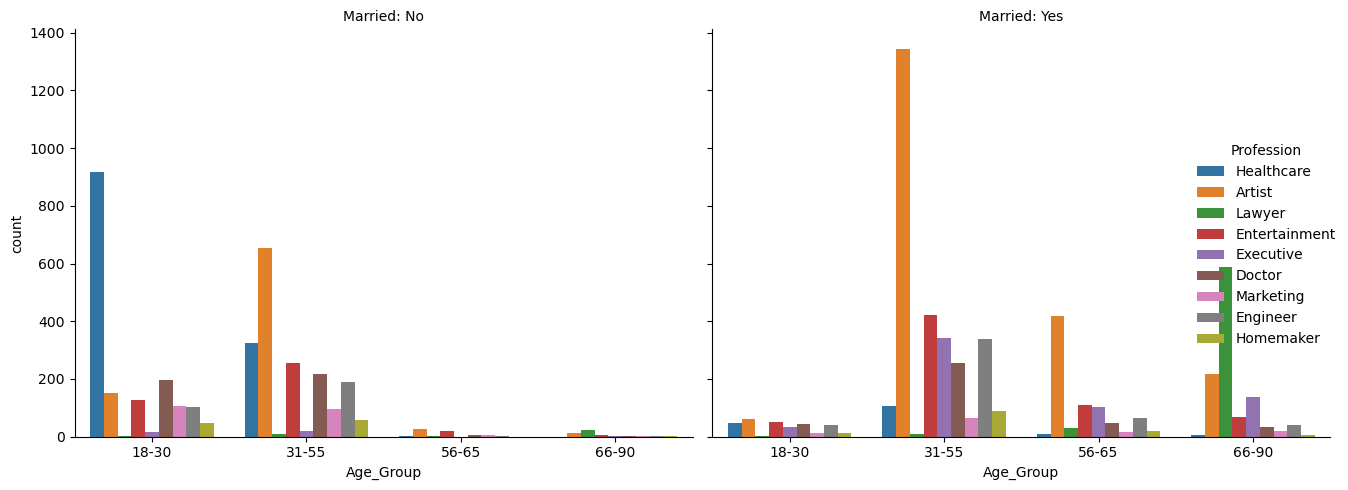

In [76]:
g = sns.catplot(data=data, x=data['Age_Group'], hue=data['Profession'], col=data['Ever_Married'],
                kind='count', height=5, aspect=1.2)
g.set_titles("Married: {col_name}")
plt.tight_layout()
plt.show()

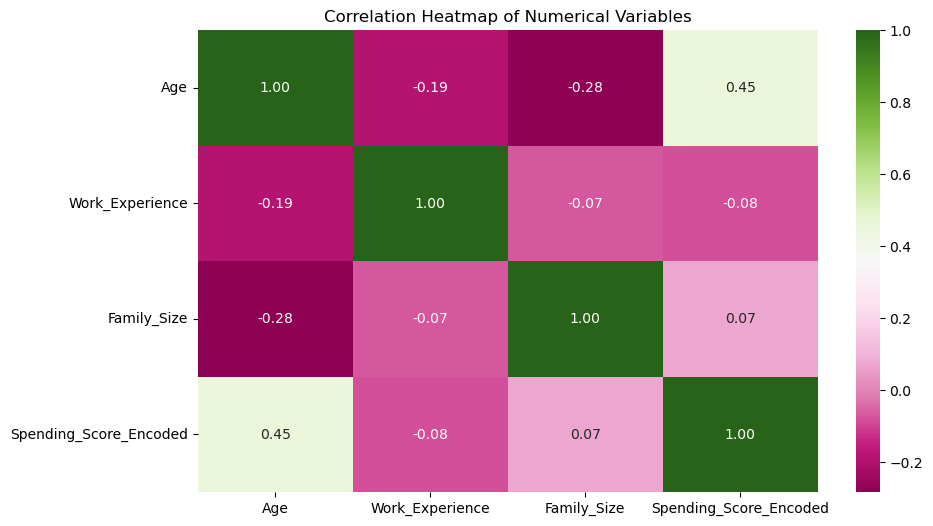

In [60]:
# Select numerical columns for correlation
numerical_cols = data.select_dtypes(include=['int64', 'float64']).copy()
numerical_cols['Spending_Score_Encoded'] = data['Spending_Score_Encoded']

# Compute the correlation matrix
correlation_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

9. How does family size affect spending score?

In [61]:
data['Spending_Score_Encoded']=data['Spending_Score'].map({'Low':1,'Medium':2,'High':3})
family_size = data['Family_Size']
spending_score = data['Spending_Score_Encoded']
corr_family_size_score = family_size.corr(spending_score)
corr_family_size_score

0.0694465433370522

10. Number of graduates and non-graduates with their spending score.

In [72]:
data["Graduated"].value_counts()

Graduated
Yes    5594
No     3225
Name: count, dtype: int64

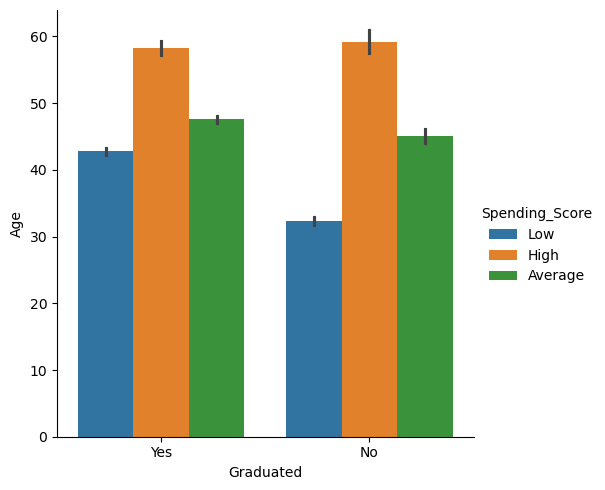

In [63]:
sns.catplot(data=data, x = data['Graduated'], y = data['Age'], hue=data['Spending_Score'], kind='bar')

11. Marital Status Within Each Age Group

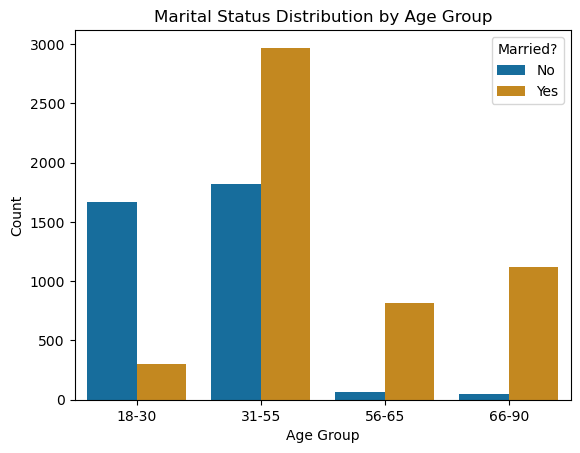

In [71]:
sns.countplot(data=data, x=data['Age_Group'], hue=data['Ever_Married'], palette='colorblind')
plt.title('Marital Status Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Married?')
plt.show()